Form submission Link: https://forms.gle/i7RyNGbggnEZa4PBA.ipynb

In [ ]:
ID = "22341034" # Edit this cell to include your ID.
Section = "11"
import numpy as np
# Rename the file as 00000000_11_B

a) [2.5 Marks]

Find a polynomial with the minimum degree such that its curve goes through all the following points: (1, -5), (2, 3), (3, 10), (4, 0).

Use a method which runs in $O(N^2)$ time complexity ($N$ = number of points). Note that, a specific method is needed here so that it is possible to fulfill the requirements in (b).

In [3]:
import numpy as np
from numpy.polynomial import Polynomial

def find_min_degree_poly(data_x, data_y):
    n = len(data_x)

    X = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            X[i, j] = data_x[i] ** (n-1-j)


    coeffs = np.linalg.solve(X, data_y)


    return Polynomial(coeffs[::-1])

In [4]:
data_x = np.array([1, 2, 3, 4])
data_y = np.array([-5, 3, 10, 0])
p = find_min_degree_poly(data_x, data_y)
print(p)

2.0 - 19.83333333·x + 15.5·x² - 2.66666667·x³


b) [2.5 Marks] Find another polynomial with a higher degree than the polynomial from (a) such that its curve goes through all the points given in (a).

Use a method which runs in $O(N)$ time complexity, assuming (a) is done and all calculations in (a) are excluded from this time complexity.

In [5]:
def create_higher_degree_poly(data_x, original_poly):

    zero_term = Polynomial([1])

    for x_i in data_x:

        zero_term = zero_term * Polynomial([-x_i, 1])


    higher_poly = original_poly + zero_term

    return higher_poly


In [6]:
a = create_higher_degree_poly(data_x, p)
print(a)

26.0 - 69.83333333·x + 50.5·x² - 12.66666667·x³ + 1.0·x⁴


c) [2.5 Marks] Find another polynomial with the minimum degree, such that its curve goes through all the points given in (a) and that the slope of the tangents at those points are 0, 1, -1, 2, respectively.

Use a method which runs in $O(N^2)$ time complexity.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [10]:


def l(k, x):
    n = len(x)
    assert (k < len(x))

    x_k = x[k]
    x_copy = np.delete(x, k)

    denominator = np.prod(x_copy - x_k)

    coeff = []

    for i in range(n):
        coeff.append(sum([np.prod(x) for x in combinations(x_copy, i)]) * (-1)**(i) / denominator)

    coeff.reverse()

    return Polynomial(coeff)
def h(k, x):
    # initialize with None. Replace with appropriate values/function calls
    l_k = None
    l_k_sqr = None
    l_k_prime = None
    coeff = None
    p = None


    # --------------------------------------------
    l_k=l(k,x)
    l_k_sqr=l_k**2
    l_k_prime=l_k.deriv(1)
    a_0=1+2*x[k]*l_k_prime(x[k])
    a_1=-2*(l_k_prime(x[k]))
    coeff=[a_0,a_1]
    p=Polynomial(coeff)
    # --------------------------------------------

    return p * l_k_sqr
def h_hat(k, x):
    # Initialize with none
    l_k = None
    l_k_sqr = None
    coeff = None
    p = None

    # --------------------------------------------
    # YOUR CODE HERE
    l_k=l(k,x)
    l_k_sqr=l_k**2
    coeff=[-x[k],1]
    p=Polynomial(coeff)
    # --------------------------------------------

    return p * l_k_sqr


In [14]:
def hermit(x, y, y_prime):
    assert len(x) == len(y)
    assert len(y) == len(y_prime)

    f = 0
    # --------------------------------------------
    for k in range(len(x)):
      f+=y[k]*h(k,x)+y_prime[k]*h_hat(k,x)

    # --------------------------------------------
    return f

In [15]:
# Points from part (a)
data_x = np.array([1, 2, 3, 4])
data_y = np.array([-5, 3, 10, 0])

y_prime = np.array([0, 1, -1, 2])


g = hermit(data_x, data_y, y_prime)
print(g)

-401.33333333 + 1359.55555556·x - 2021.17592593·x² + 1684.92592593·x³ -
831.62037037·x⁴ + 239.03703704·x⁵ - 36.7037037·x⁶ + 2.31481481·x⁷


d) [2.5 Marks] Evaluate the polynomials form (a), (b) and (c) at all the following points: x = -3, 7.

In [18]:
x=np.array([-3.7])
h=g(x)
j=a(x)
q=p(x)
print(h)
print(j)
print(q)

[-556211.56037242]
[1804.7491]
[422.653]


e) [2.5 Marks] Plot the graph of the polynomials from (a), (b) and (c) in the domain [-20, 20] in one image (3 curves in total). Use at least 1000 samples for each curve.

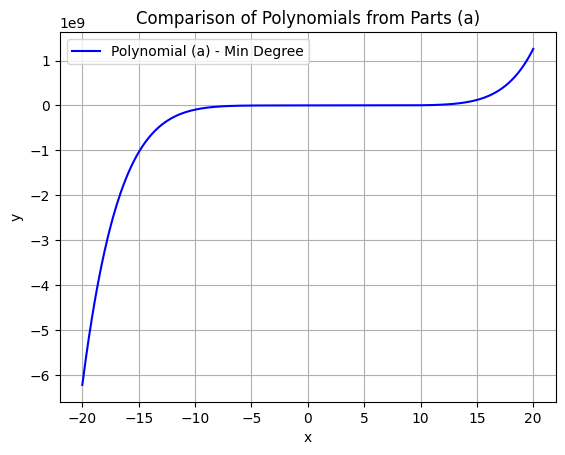

In [22]:
x_vals = np.linspace(-20, 20, 1000)
y_a = g(x_vals)
y_b = a(x_vals)
y_c = p(x_vals)
plt.plot(x_vals, y_a, 'b-', label='Polynomial (a) - Min Degree')
plt.title('Comparison of Polynomials from Parts (a)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()


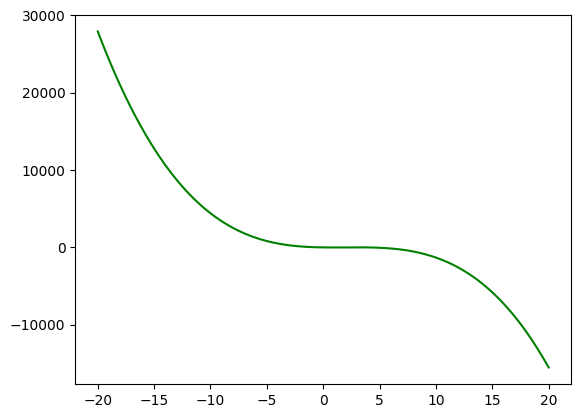

In [21]:
plt.plot(x_vals, y_c, 'g-', label='Polynomial (c) - Hermite')


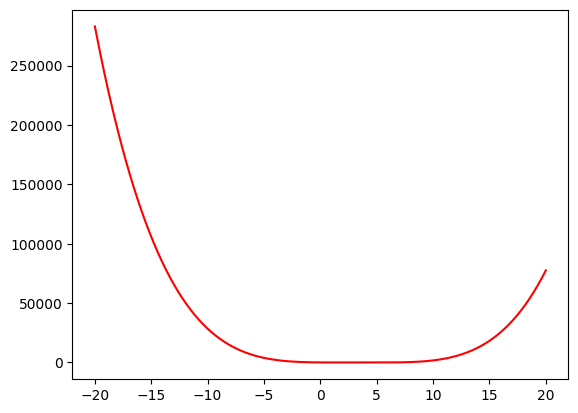

In [20]:
plt.plot(x_vals, y_b, 'r-', label='Polynomial (b) - Higher Degree')

f) [2.5 Marks] If the original function is the polynomial from (a) then find the absolute errors for both polynomials from (b) and (c) at all the following points: x = 1.5, 3.5

In [23]:
x=1.5
y=3.5
fn=a(x)
fm=a(y)
pn=p(x)
pm=p(y)
herm=g(x)
her=g(y)
error_b_x = abs(pn - fn)
error_b_y = abs(pm - fm)
error_c_x = abs(herm - fn)
error_c_y = abs(her - fm)
print(f"Polynomial values at x = 1.5:")
print(f"a(1.5) = {fn}")
print(f"p(1.5) = {pn}")
print(f"g(1.5) = {herm}")

print(f"\nPolynomial values at x = 3.5:")
print(f"a(3.5) = {fm}")
print(f"p(3.5) = {pm}")
print(f"g(3.5) = {her}")

print(f"\nAbsolute errors:")
print(f"Part (b) at x = 1.5: |p(1.5) - a(1.5)| = {error_b_x}")
print(f"Part (b) at x = 3.5: |p(3.5) - a(3.5)| = {error_b_y}")
print(f"Part (c) at x = 1.5: |g(1.5) - a(1.5)| = {error_c_x}")
print(f"Part (c) at x = 3.5: |g(3.5) - a(3.5)| = {error_c_y}")

Polynomial values at x = 1.5:
a(1.5) = -2.8125000000000036
p(1.5) = -1.8749999999999982
g(1.5) = 3.561197916665378

Polynomial values at x = 3.5:
a(3.5) = 7.187500000000039
p(3.5) = 8.12499999999999
g(3.5) = 12.805989583311657

Absolute errors:
Part (b) at x = 1.5: |p(1.5) - a(1.5)| = 0.9375000000000053
Part (b) at x = 3.5: |p(3.5) - a(3.5)| = 0.9374999999999503
Part (c) at x = 1.5: |g(1.5) - a(1.5)| = 6.373697916665382
Part (c) at x = 3.5: |g(3.5) - a(3.5)| = 5.618489583311618
